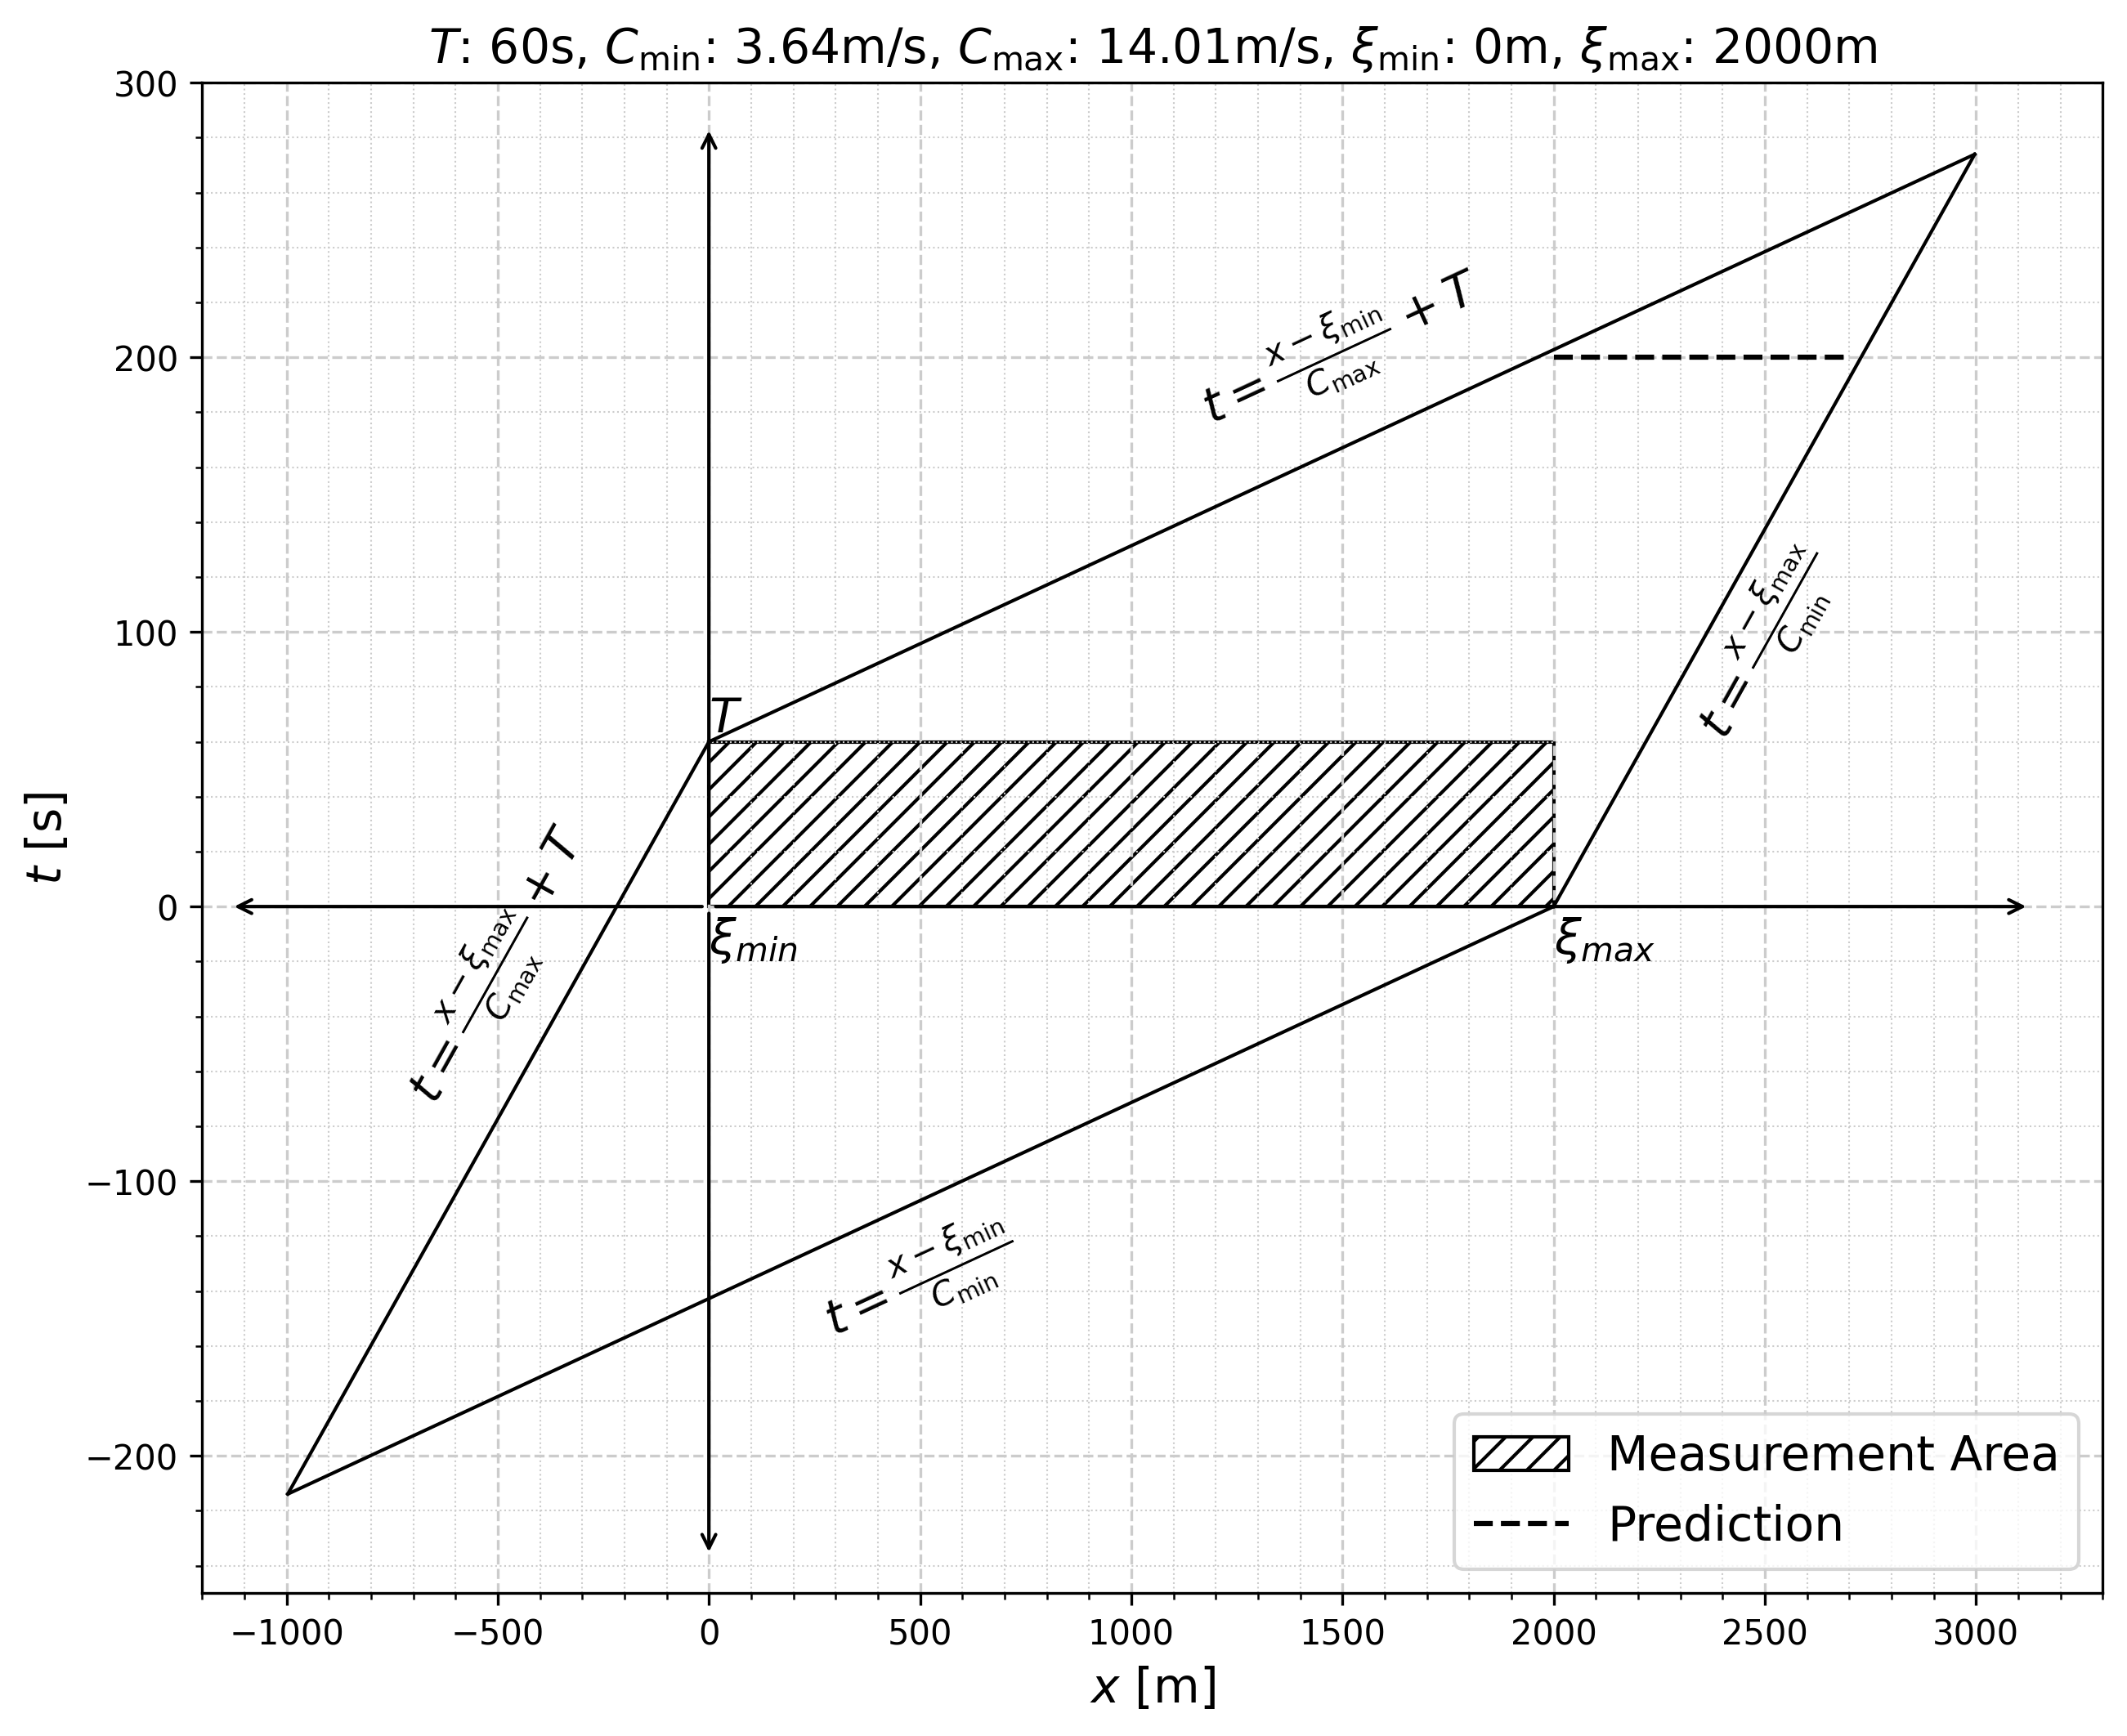

In [104]:
import matplotlib.pyplot as plt
import numpy as np

e_min = 0
e_max = 2000

c_min = 3.64
c_max = 14.01

T = 60

x_min = -1200
x_max = 3300
y_min = -250
y_max = 300



x1 = (e_min*c_max - c_min*e_max) / (c_max - c_min) - T * (c_max * c_min) / (c_max - c_min)
t1 = (x1 - e_max) / c_max

x2 = (e_max*c_max - c_min*e_min) / (c_max - c_min) + T * (c_max * c_min) / (c_max - c_min)
t2 = (x2 - e_max) / c_min

points_x = [T, t2, 0, t1, T]
points_y = [e_min, x2, e_max, x1, e_min]

box_x = [T, T, 0, 0] #T]
box_y = [e_min, e_max, e_max, e_min] #, e_min]

equations = [
    fr"$t=\frac{{x - x_{{\max}}}}{{c_{{\min}}}}$", 
    r"eq2", 
    r"eq3", 
    r"eq4"
]

equations = [
    fr"$t=\frac{{x - \xi_{{\min}}}}{{C_{{\max}}}} + T$",
    fr"$t = \frac{{x - \xi_{{\max}}}}{{C_{{\min}}}}$", 
    fr"$t = \frac{{x - \xi_{{\min}}}}{{C_{{\min}}}}$", 
    fr"$t=\frac{{x - \xi_{{\max}}}}{{C_{{\max}}}} + T$"
]

fontsize = 14
fig, ax = plt.subplots(figsize=(10, 8))
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

ax.grid(True, which='major', linewidth=0.8)
ax.minorticks_on()
ax.grid(True, which='minor', linestyle=':', linewidth=0.5)

ax = plt.gca()
transform = ax.transData.transform

for index in range(len(points_x)-1):
    x0, x1 = points_y[index], points_y[index+1]   # matplotlib x-coords
    y0, y1 = points_x[index], points_x[index+1]

    xm = (x0 + x1) / 2
    ym = (y0 + y1) / 2

    # compute angle in degrees for text rotation
    (x0_disp, y0_disp) = transform((x0, y0))
    (x1_disp, y1_disp) = transform((x1, y1))
    angle = np.degrees(np.arctan2(y1_disp - y0_disp, x1_disp - x0_disp))+[0, 180, 180, 0][index]

    # place the equation string
    plt.text(xm, ym, equations[index],
             rotation=angle,
             ha="center", va=["bottom", "top", "top", "bottom"][index],
             fontsize=fontsize)

    plt.plot([x0, x1], [y0, y1], color="k", linewidth=1)
    # plt.plot(box_y[index:index+2], box_x[index:index+2], color="k", linewidth=1)

plt.fill(box_y, box_x, color="white", hatch='///', edgecolor='black', linewidth=1, label="Measurement Area")

# plt.grid()
# plt.title("Predictable Zone With continous measurement:\n" + fr" $\xi (t, x), \quad x \in [0, 2000], t \in [0, 60]$" + "\n" + fr"$C_{{g,\min}}={c_min:.2f}m/s, \quad C_{{g,\max}}={c_max:.2f}m/s$", fontsize=20)
plt.ylabel("$t$ [s]", fontsize=fontsize)
plt.xlabel("$x$ [m]", fontsize=fontsize)

# plt.plot([points_y[1], 0], [points_x[1], points_x[1]],"k--")
# plt.plot([points_y[3], 0], [points_x[3], points_x[3]],"k--")
# plt.text(0-x_max*0.01, points_x[1], fr"$T_e$", ha="right", va="center", fontsize=fontsize)
# plt.text(0+x_max*0.01, points_x[3], fr"$T_s$", ha="left", va="center", fontsize=fontsize)

# plt.text(x_max*0.95, -y_max*0.01, fr"$x$", ha="right", va="top", fontsize=fontsize)
# plt.text(x_max*0.01, y_max*0.95, fr"$t$", ha="left", va="top", fontsize=fontsize)
plt.text(points_y[0], points_x[0], fr"$T$", ha="left", va="bottom", fontsize=fontsize)
plt.text(points_y[2], points_x[2]-y_max*0.01, fr"$\xi_{{max}}$", ha="left", va="top", fontsize=fontsize)
plt.text(e_min, 0-y_max*0.01, fr"$\xi_{{min}}$", ha="left", va="top", fontsize=fontsize)
ax.annotate('', xy=(x_max*0.95, 0), xytext=(0, 0), arrowprops=dict(arrowstyle="->", color='black', lw=1))
ax.annotate('', xy=(0, y_max*0.95), xytext=(0, 0), arrowprops=dict(arrowstyle="->", color='black', lw=1))
ax.annotate('', xy=(x_min*0.95, 0), xytext=(0, 0), arrowprops=dict(arrowstyle="->", color='black', lw=1))
ax.annotate('', xy=(0, y_min*0.95), xytext=(0, 0), arrowprops=dict(arrowstyle="->", color='black', lw=1))

plt.plot([x[cut_index], x[cut_index_2]], [200, 200], "--", color = "k", label="Prediction")
plt.title(fr"$T$: 60s, $C_{{\min}}$: {c_min:.2f}m/s, $C_{{\max}}$: {c_max:.2f}m/s, $\xi_{{\min}}$: {e_min:.0f}m, $\xi_{{\max}}$: {e_max:.0f}m", fontsize=fontsize)

plt.legend(loc = 4, fontsize=fontsize)
plt.savefig("results/case_1d.pdf", dpi=300, bbox_inches='tight')
plt.show()

# jupyter nbconvert ML_update.ipynb --to pdf --TagRemovePreprocessor.enabled=True --TagRemovePreprocessor.remove_input_tags="['hide_input']" --TagRemovePreprocessor.remove_all_outputs_tags="['hide_output']" --PDFExporter.preprocessors="['nbconvert.preprocessors.TagRemovePreprocessor']"

In [1]:
import sys
import os
import glob
import h5py
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import rfft, irfft
from matplotlib.animation import FuncAnimation

current_dir = os.getcwd()
sys.path.append(os.path.abspath(os.path.join(current_dir, '..')))
h5_files = glob.glob(os.path.join("..\\output", "*.h5"))

eta_hat, phi_hat, Hs, Tp, modes, time, length, x = None, None, None, None, None, None, None, None

with h5py.File("Z:\\files\\simulation_1d_compressed.h5", "r") as data:
    eta_hat = data["eta_hat"][:]
    phi_hat = data["phi_hat"][:]
    Hs = data["Hs"][:]
    Tp = data["Tp"][:]
    time = data["time"][:]

    modes = data.attrs["modes"]
    length = data.attrs["length"]
    Ta = data.attrs["Ta"]
    x = np.linspace(0, length, 2*modes)

index = np.argmin(np.abs(time - 2*Ta))

eta_hat = eta_hat[:, index:, :]
phi_hat = phi_hat[:, index:, :]
time = time[index:] - time[index]

gamma = [5.09876841, 5.08157858, 5.34864416, 5.63615218, 5.88708012, 5.01193477,
         5.93140696, 5.46903256, 5.66988397, 5.01676391, 5.76906378, 5.96412179,
         5.30964201, 5.27624417, 5.79561294, 5.7158428, 5.33764831, 5.26476746,
         5.53406432, 5.39710143, 5.15765819, 5.02806415, 5.77707532, 5.93618814,
         5.97176406, 5.98868139, 5.29880662, 5.82266746, 5.20731177, 5.54811277,
         5.71976428, 5.19888208, 5.41254766, 5.73148341, 5.15247344, 5.4681203,
         5.05118296, 5.30960503, 5.95435698, 5.17050983, 5.83577275, 5.53429938,
         5.70765999, 5.32937023, 5.78633074, 5.93428673, 5.95187918, 5.37549261,
         5.22108695, 5.98662534, 5.85279143, 5.77047338, 5.70352807, 5.67920045,
         5.43157037, 5.54620377, 5.79312688, 5.76241602, 5.18280772, 5.22227618,
         5.41266203, 5.89581313, 5.11454293, 5.21004316]

cut_index = np.argmin(np.abs(x-2000))
cut_index_2 = np.argmin(np.abs(x-2700))+1

In [3]:
# Creating dataset
prediction_time = 280 # 140 sec
measure_time = 120 # one minute
num_measurements = 6
step = int(measure_time / num_measurements)

train_percentage = 0.7
batch_size = 32

In [25]:
import jax
import jax.numpy as jnp

sys.path.append(os.path.abspath(os.path.join(current_dir, '..')))

from HOSim import solver

for index in range(64):
    X = eta_hat[index, :-prediction_time, :]
    y = eta_hat[index, prediction_time+measure_time:-1, :]

    X = irfft(X)
    y = irfft(y)

    X[:, cut_index:] = 0

    # Create dataset using 6 measurements with 10 sec inbetween

    X = np.stack([
        X[0*step:-measure_time+0*step-1],
        X[1*step:-measure_time+1*step-1],
        X[2*step:-measure_time+2*step-1],
        X[3*step:-measure_time+3*step-1],
        X[4*step:-measure_time+4*step-1],
        X[5*step:-measure_time+5*step-1],
        X[6*step:-measure_time+6*step-1],
    ], axis=1)

    # Split into train and test

    X_train = X[:int(X.shape[0]*train_percentage), :, :]
    X_test = X[int(X.shape[0]*train_percentage):, :, :]
    y_train = y[:int(y.shape[0]*train_percentage), :]
    y_test = y[int(y.shape[0]*train_percentage):, :]

    f_jit = jax.jit(solver.f, static_argnums=(2, 3, 4, 5, 6))
    rk4_step_jit = jax.jit(solver.rk4_step, static_argnums=(2, 3, 4, 5, 6, 7, 8))
    k = np.arange(0, X_train.shape[-1]//2+1) * 2 * np.pi / length
    g = 9.81

    L1 = np.ones(X_train.shape[-1]//2)*2
    L1 = np.insert(L1, 0, 0)

    L2 = 1.0 / (np.arange(1, X_train.shape[-1]//2+1) * 2 * np.pi / length) - g
    L2 = np.insert(L2, 0, 0)

    eta_0 = X_train[0, 0, :]
    eta_hat_0 = rfft(eta_0)
    phi_hat_0 = eta_hat_0[1:] * np.exp(-1.j * np.pi / 2) * np.sqrt(g / k[1:])
    phi_hat_0 = np.insert(phi_hat_0, 0, 0)

    y_hat = jnp.asarray(np.concatenate((eta_hat_0, phi_hat_0)), dtype=jnp.complex128)

    eta_saved = np.zeros(((6+14) * 20 + 1, 2, modes+1), dtype=np.complex128)
    eta_obs = X_train[0, 0, :]

    for i in range(6+14):
        for j in range(1, 401):
            y_hat = rk4_step_jit(200, y_hat, 0.025, X_train.shape[-1]//2, g, k[1], 8, 0.001, f_jit)
            if j % 20 == 0:
                eta_saved[i*20+j//20, 0] = y_hat[0:y_hat.shape[0]//2]
                eta_saved[i*20+j//20, 1] = y_hat[y_hat.shape[0]//2:]

        if i < 6:
            eta = irfft(y_hat[:y_hat.shape[0]//2])
            
            eta_obs = X_train[0, i+1, :]
            eta_obs[cut_index:] = eta[cut_index:]
            eta_hat_obs = rfft(eta_obs)

            y_hat = y_hat.at[:y_hat.shape[0]//2].add(0.5 * L1 * (eta_hat_obs - y_hat[:y_hat.shape[0]//2]))
            y_hat = y_hat.at[y_hat.shape[0]//2:].add(0.5 * L2 * (eta_hat_obs - y_hat[:y_hat.shape[0]//2]))

    np.savez_compressed(f"save/1d_physical_{index}.npz", y=eta_saved, y_test=y_train[0])
    print("Saved:", index)

Saved: 0
Saved: 1
Saved: 2
Saved: 3
Saved: 4
Saved: 5
Saved: 6
Saved: 7
Saved: 8
Saved: 9
Saved: 10
Saved: 11
Saved: 12
Saved: 13
Saved: 14
Saved: 15
Saved: 16
Saved: 17
Saved: 18
Saved: 19
Saved: 20
Saved: 21
Saved: 22
Saved: 23
Saved: 24
Saved: 25
Saved: 26
Saved: 27
Saved: 28
Saved: 29
Saved: 30
Saved: 31
Saved: 32
Saved: 33
Saved: 34
Saved: 35
Saved: 36
Saved: 37
Saved: 38
Saved: 39
Saved: 40
Saved: 41
Saved: 42
Saved: 43
Saved: 44
Saved: 45
Saved: 46
Saved: 47
Saved: 48
Saved: 49
Saved: 50
Saved: 51
Saved: 52
Saved: 53
Saved: 54
Saved: 55
Saved: 56
Saved: 57
Saved: 58
Saved: 59
Saved: 60
Saved: 61
Saved: 62
Saved: 63


In [ ]:
Hs_result = []
Tp_result = []
gamma_result = []
RMS_result = []
MAE_result = []

for index in range(64):  
    data = np.load(f"save/1d_physical_{index}.npz")
    y_hat = data["y"]
    if np.isnan(y_hat).sum() != 0: continue
    y_train = data["y_test"]
    y = irfft(y_hat)

    error = y_train[cut_index:cut_index_2] - y[-1, 0, cut_index:cut_index_2]
    RMSE = np.sqrt(np.mean(error**2))
    MAE = np.mean(np.abs(error))
    if RMSE > 0.7:
        continue

    print(index, RMSE)

    Hs_result.append(Hs[index])
    Tp_result.append(Tp[index])
    gamma_result.append(gamma[index])
    RMS_result.append(RMSE)
    MAE_result.append(MAE)

    # plt.plot(y[-1, 0], "--", color="k")
    # plt.plot(y_train, "-", color="k")
    # plt.xlim(cut_index, cut_index_2)
    # plt.show()

    

Hs_result = np.array(Hs_result)
Tp_result = np.array(Tp_result)
RMS_result = np.array(RMS_result)
MAE_result = np.array(MAE_result)

0 0.11068587856251119
1 0.11627031797089155
2 0.11104592819785951
3 0.1754725724663638
4 0.17290371843039415
5 0.1451778078823559
6 0.39667183194960337
7 0.2853594245229061
9 0.11273334673220535
10 0.29497196524271146
11 0.12489949398646126
12 0.2803912287440233
13 0.2111702564096187
14 0.23236614179344176
15 0.37635868097626474
16 0.12744014456196873
17 0.4136816927602582
18 0.26717795953621754
19 0.48568421204903134
20 0.4288135006300304
21 0.14144324187136154
22 0.15791775713249182
23 0.3799514279833626
24 0.14917791455713908
25 0.1484135133699277
26 0.5129263588132345
27 0.09686448457122261
28 0.20931369535935224
29 0.2304144307048174
30 0.19062257956515521
31 0.20844947677285483
32 0.37237003367040333
33 0.29065087952868407
34 0.16266224271293717
35 0.4049849155013676
36 0.26026923636434857
37 0.224496270583374
38 0.23474056248735883
39 0.07025329764390735
40 0.3386267842406224
41 0.2358799726400964
42 0.13797555854115254
43 0.2385687586708903
45 0.2522769041970887
47 0.3062922126

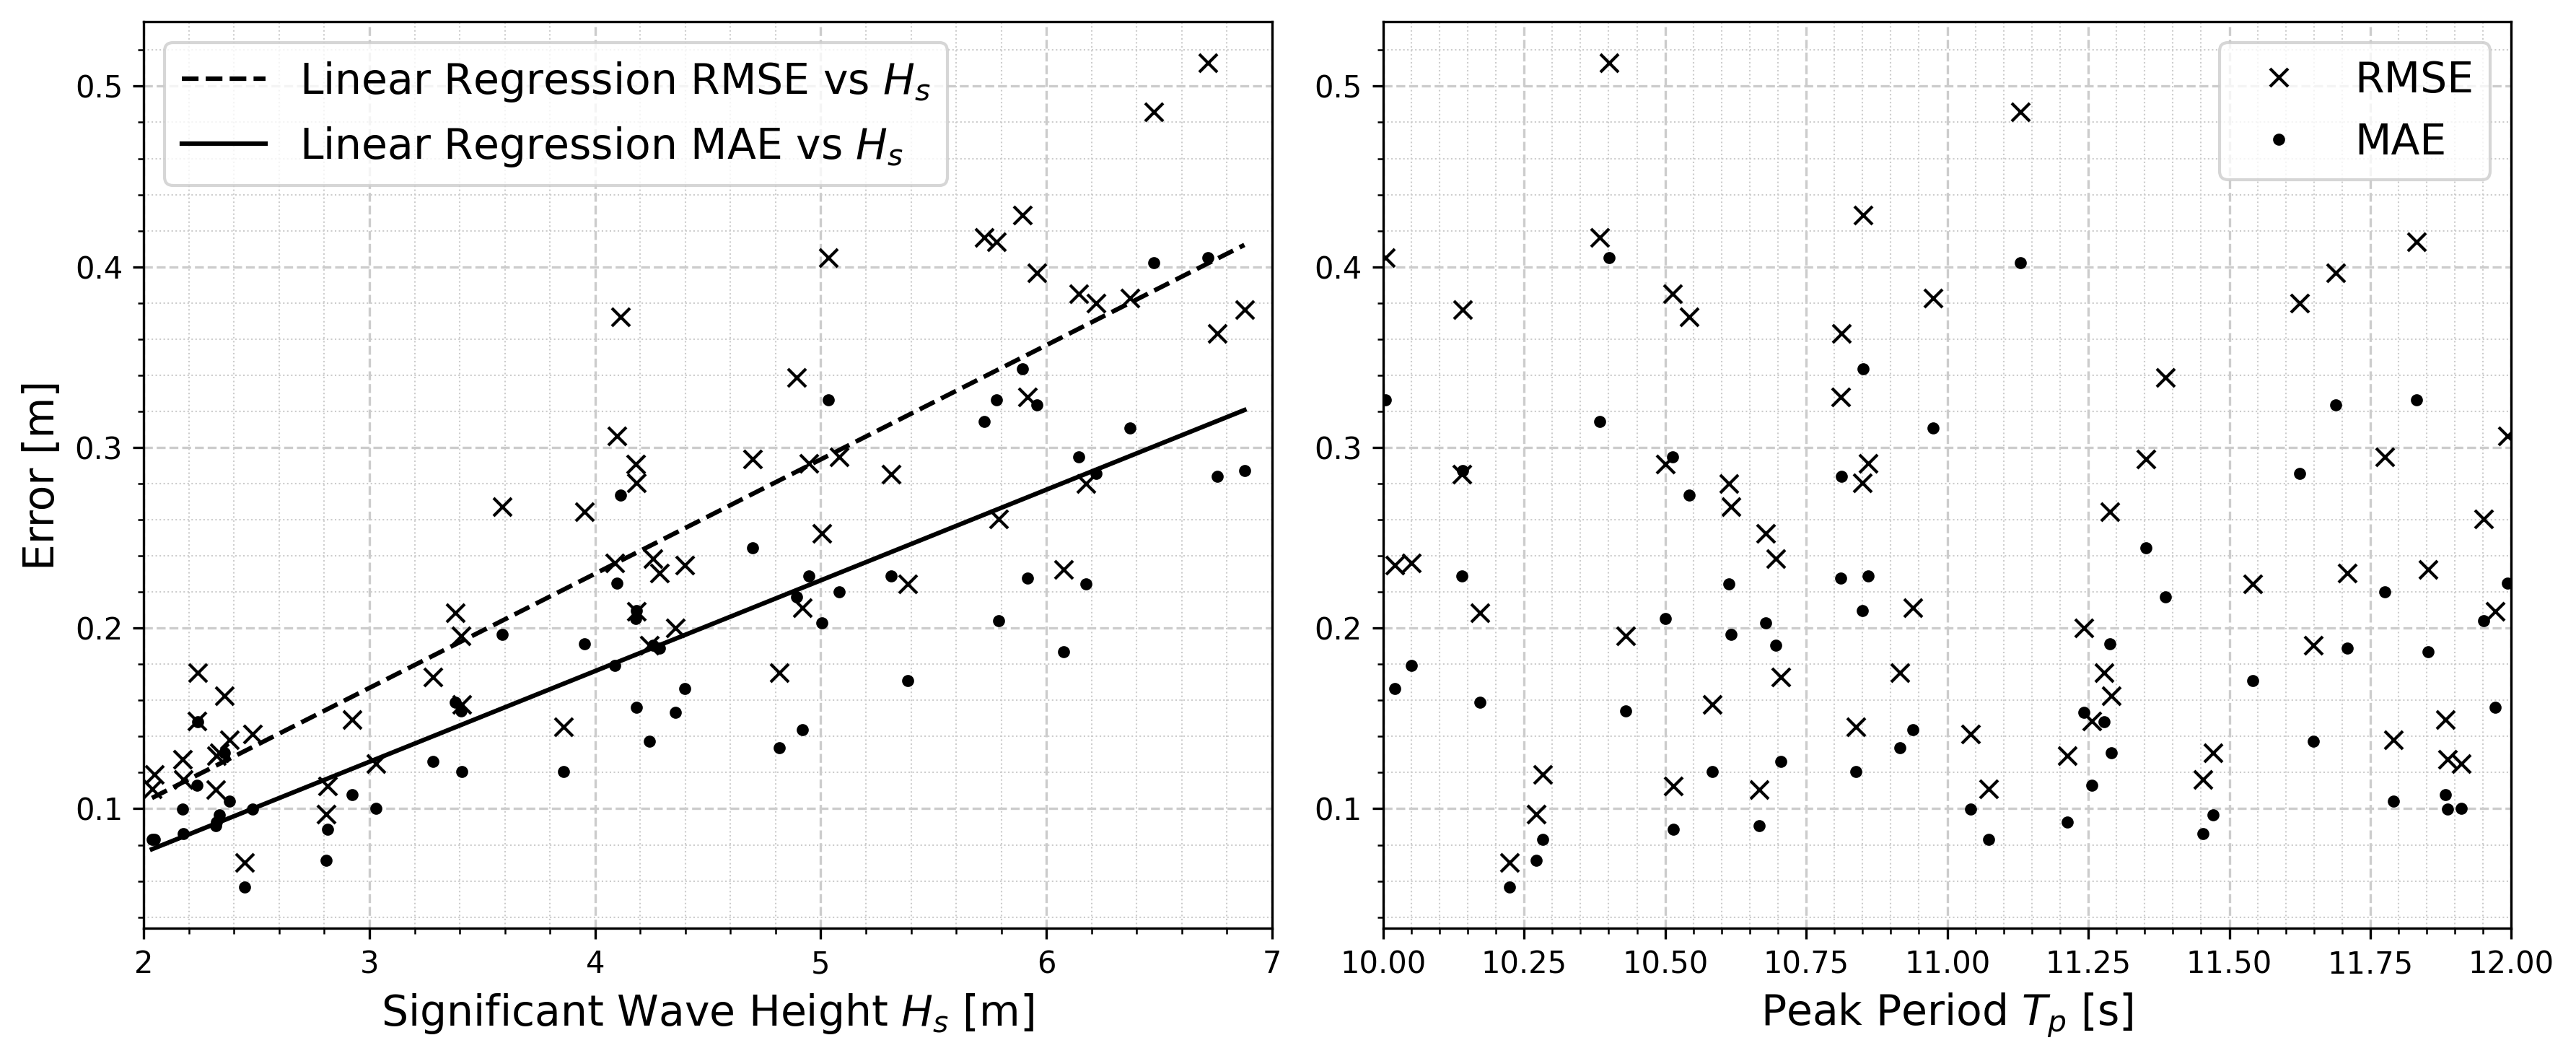

In [ ]:
import matplotlib as mpl

mpl.rcParams.update({
    'axes.edgecolor': 'black',
    'axes.labelcolor': 'black',
    'xtick.color': 'black',
    'ytick.color': 'black',
    'axes.grid': True,
    'grid.linestyle': '--',
    'grid.color': '#cccccc',
    'figure.dpi': 300,
    'axes.facecolor': 'white',
    'figure.facecolor': 'white',
})

n_blue = '#1f77b4'  # Navy Blue
d_orange = '#ff7f0e'
s_blue = '#4682b4'
s_gray = '#708090'
charcoal = "#36454F"
d_cyan = '#008B8B' 
blue = "#005792"
black = "#000000"
crimson = "#DC143C"

x_ = np.linspace(np.min(Hs_result), np.max(Hs_result), 25)
m, c = np.polyfit(Hs_result, RMS_result, 1)
rmse_ = m * x_ + c

m, c = np.polyfit(Hs_result, MAE_result, 1)
mae_ = m * x_ + c

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# First plot: Hs vs RMS
fontsize = 14

axs[0].plot(Hs_result, RMS_result, 'x', color="k", markersize=6)
axs[0].plot(Hs_result, MAE_result, '.', color="k", markersize=6)
axs[0].plot(x_, rmse_, "--", color="k", label=fr"Linear Regression RMSE vs $H_s$")
axs[0].plot(x_, mae_, "-", color="k", label=fr"Linear Regression MAE vs $H_s$")
axs[0].set_xlabel('Significant Wave Height $H_s$ [m]', fontsize=fontsize)
axs[0].set_ylabel('Error [m]', fontsize=fontsize)
axs[0].legend(fontsize=fontsize)
axs[0].set_xlim(2, 7)

axs[0].grid(True, which='major', linewidth=0.8)
axs[0].minorticks_on()
axs[0].grid(True, which='minor', linestyle=':', linewidth=0.5)

# Second plot: Tp vs RMS
axs[1].plot(Tp_result, RMS_result, 'x', color="k", label="RMSE")
axs[1].plot(Tp_result, MAE_result, '.', color="k", label="MAE")
axs[1].set_xlabel('Peak Period $T_p$ [s]', fontsize=fontsize)
axs[1].set_xlim(10, 12)
axs[1].legend(fontsize=fontsize)
axs[1].grid(True, which='major', linewidth=0.8)
axs[1].minorticks_on()
axs[1].grid(True, which='minor', linestyle=':', linewidth=0.5)

# Tidy layout
plt.tight_layout()
plt.savefig("results/rmse_mae_physical_1d.pdf", dpi=300, bbox_inches='tight')
plt.show()

[5.09876841, 5.08157858, 5.34864416, 5.63615218, 5.88708012, 5.01193477, 5.93140696, 5.46903256, 5.01676391, 5.76906378, 5.96412179, 5.30964201, 5.27624417, 5.79561294, 5.7158428, 5.33764831, 5.26476746, 5.53406432, 5.39710143, 5.15765819, 5.02806415, 5.77707532, 5.93618814, 5.97176406, 5.98868139, 5.29880662, 5.82266746, 5.20731177, 5.54811277, 5.71976428, 5.19888208, 5.41254766, 5.73148341, 5.15247344, 5.4681203, 5.05118296, 5.30960503, 5.95435698, 5.17050983, 5.83577275, 5.53429938, 5.70765999, 5.32937023, 5.93428673, 5.37549261, 5.22108695, 5.98662534, 5.77047338, 5.70352807, 5.67920045, 5.43157037, 5.54620377, 5.79312688, 5.76241602, 5.18280772, 5.22227618, 5.41266203, 5.89581313, 5.11454293, 5.21004316]


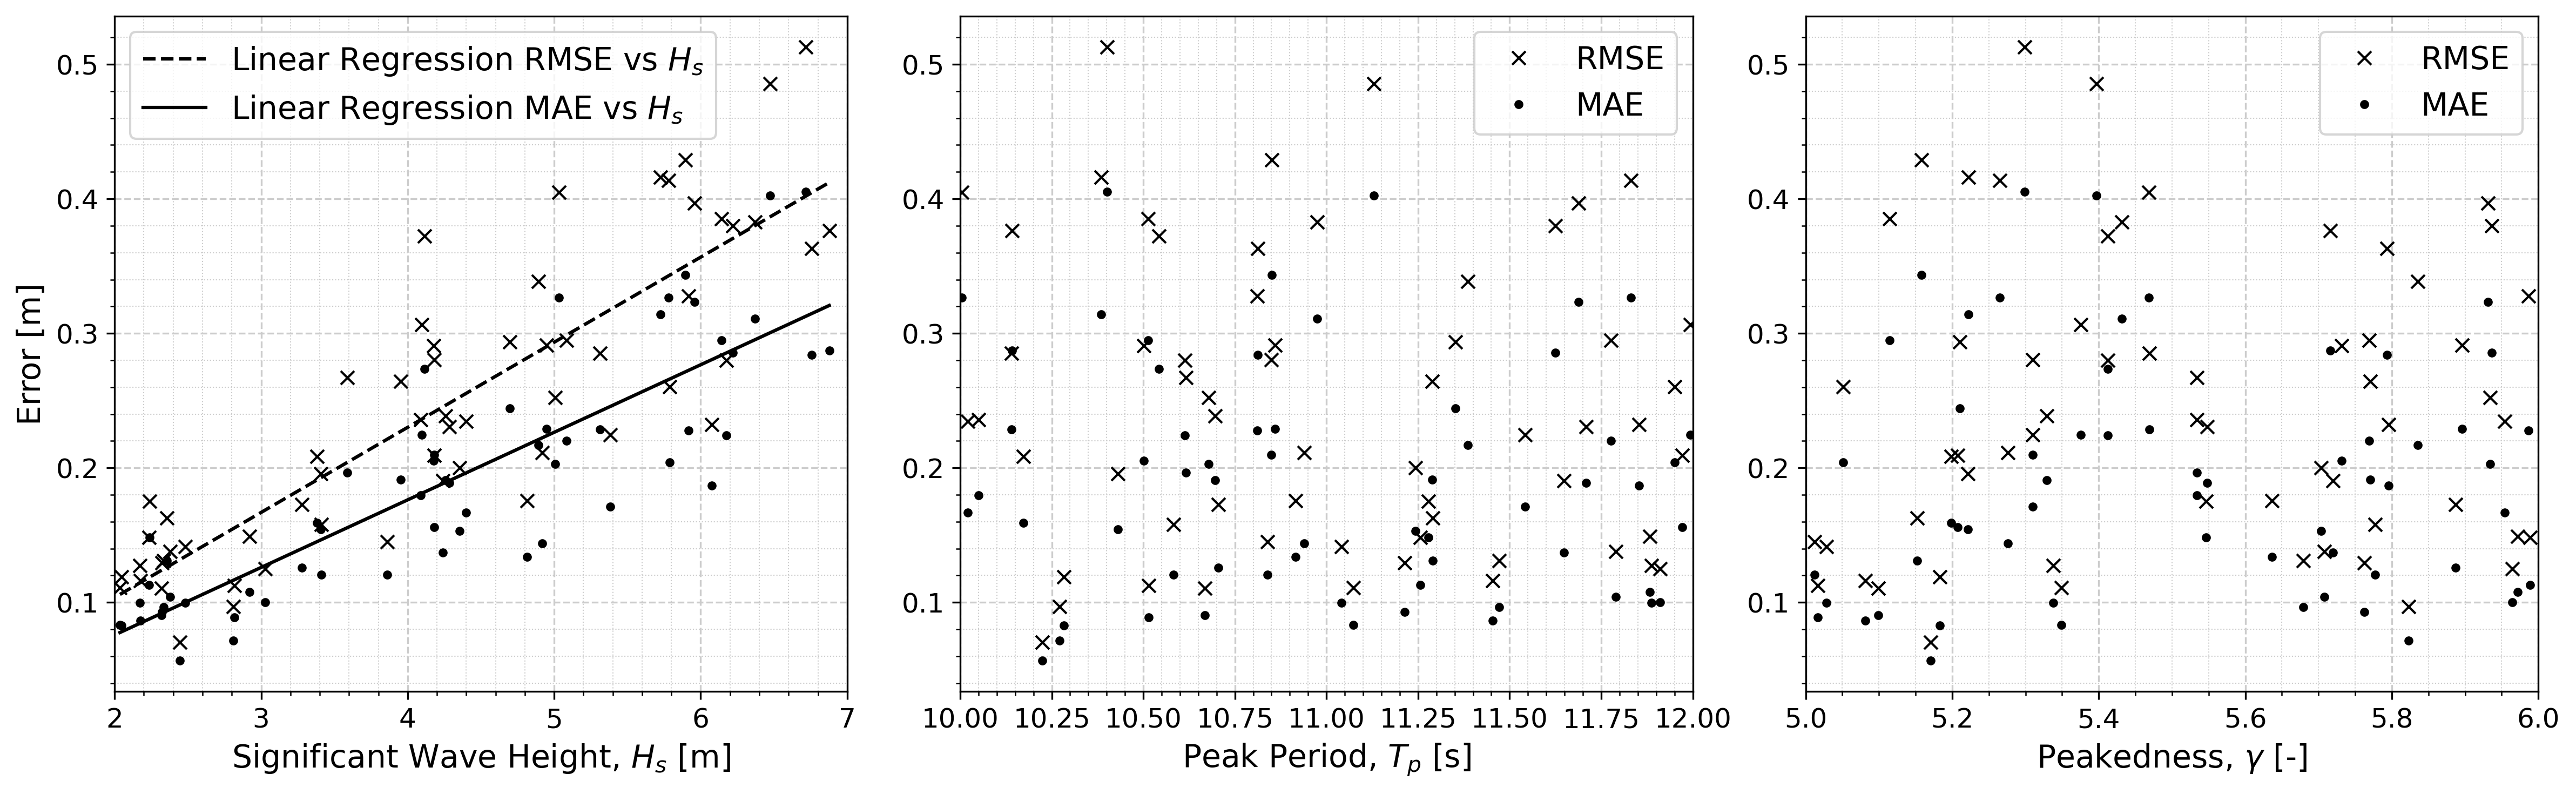

In [21]:
import matplotlib as mpl

mpl.rcParams.update({
    'axes.edgecolor': 'black',
    'axes.labelcolor': 'black',
    'xtick.color': 'black',
    'ytick.color': 'black',
    'axes.grid': True,
    'grid.linestyle': '--',
    'grid.color': '#cccccc',
    'figure.dpi': 300,
    'axes.facecolor': 'white',
    'figure.facecolor': 'white',
})

n_blue = '#1f77b4'  # Navy Blue
d_orange = '#ff7f0e'
s_blue = '#4682b4'
s_gray = '#708090'
charcoal = "#36454F"
d_cyan = '#008B8B' 
blue = "#005792"
black = "#000000"
crimson = "#DC143C"

x_ = np.linspace(np.min(Hs_result), np.max(Hs_result), 25)
m, c = np.polyfit(Hs_result, RMS_result, 1)
rmse_ = m * x_ + c

m, c = np.polyfit(Hs_result, MAE_result, 1)
mae_ = m * x_ + c

fig, axs = plt.subplots(1, 3, figsize=(16, 5))

# First plot: Hs vs RMS
fontsize = 14

print(gamma_result)

axs[0].plot(Hs_result, RMS_result, 'x', color="k", markersize=6)
axs[0].plot(Hs_result, MAE_result, '.', color="k", markersize=6)
axs[0].plot(x_, rmse_, "--", color="k", label=fr"Linear Regression RMSE vs $H_s$")
axs[0].plot(x_, mae_, "-", color="k", label=fr"Linear Regression MAE vs $H_s$")
axs[0].set_xlabel('Significant Wave Height, $H_s$ [m]', fontsize=fontsize)
axs[0].set_ylabel('Error [m]', fontsize=fontsize)
axs[0].legend(fontsize=fontsize)
axs[0].set_xlim(2, 7)
axs[0].grid(True, which='major', linewidth=0.8)
axs[0].minorticks_on()
axs[0].grid(True, which='minor', linestyle=':', linewidth=0.5)
axs[0].tick_params(labelsize=12)

# Second plot: Tp vs RMS
axs[1].plot(Tp_result, RMS_result, 'x', color="k", label="RMSE")
axs[1].plot(Tp_result, MAE_result, '.', color="k", label="MAE")
axs[1].set_xlabel('Peak Period, $T_p$ [s]', fontsize=fontsize)
axs[1].set_xlim(10, 12)
axs[1].legend(fontsize=fontsize)
axs[1].grid(True, which='major', linewidth=0.8)
axs[1].minorticks_on()
axs[1].grid(True, which='minor', linestyle=':', linewidth=0.5)
axs[1].tick_params(labelsize=12)

axs[2].plot(gamma_result, RMS_result, 'x', color="k", label="RMSE")
axs[2].plot(gamma_result, MAE_result, '.', color="k", label="MAE")
axs[2].set_xlabel('Peakedness, $\gamma$ [-]', fontsize=fontsize)
axs[2].set_xlim(5, 6)
axs[2].legend(fontsize=fontsize)
axs[2].grid(True, which='major', linewidth=0.8)
axs[2].minorticks_on()
axs[2].grid(True, which='minor', linestyle=':', linewidth=0.5)
axs[2].tick_params(labelsize=12)
# Tidy layout
plt.tight_layout()
plt.savefig("results/rmse_mae_physical_1d.pdf", dpi=300, bbox_inches='tight')
plt.show()

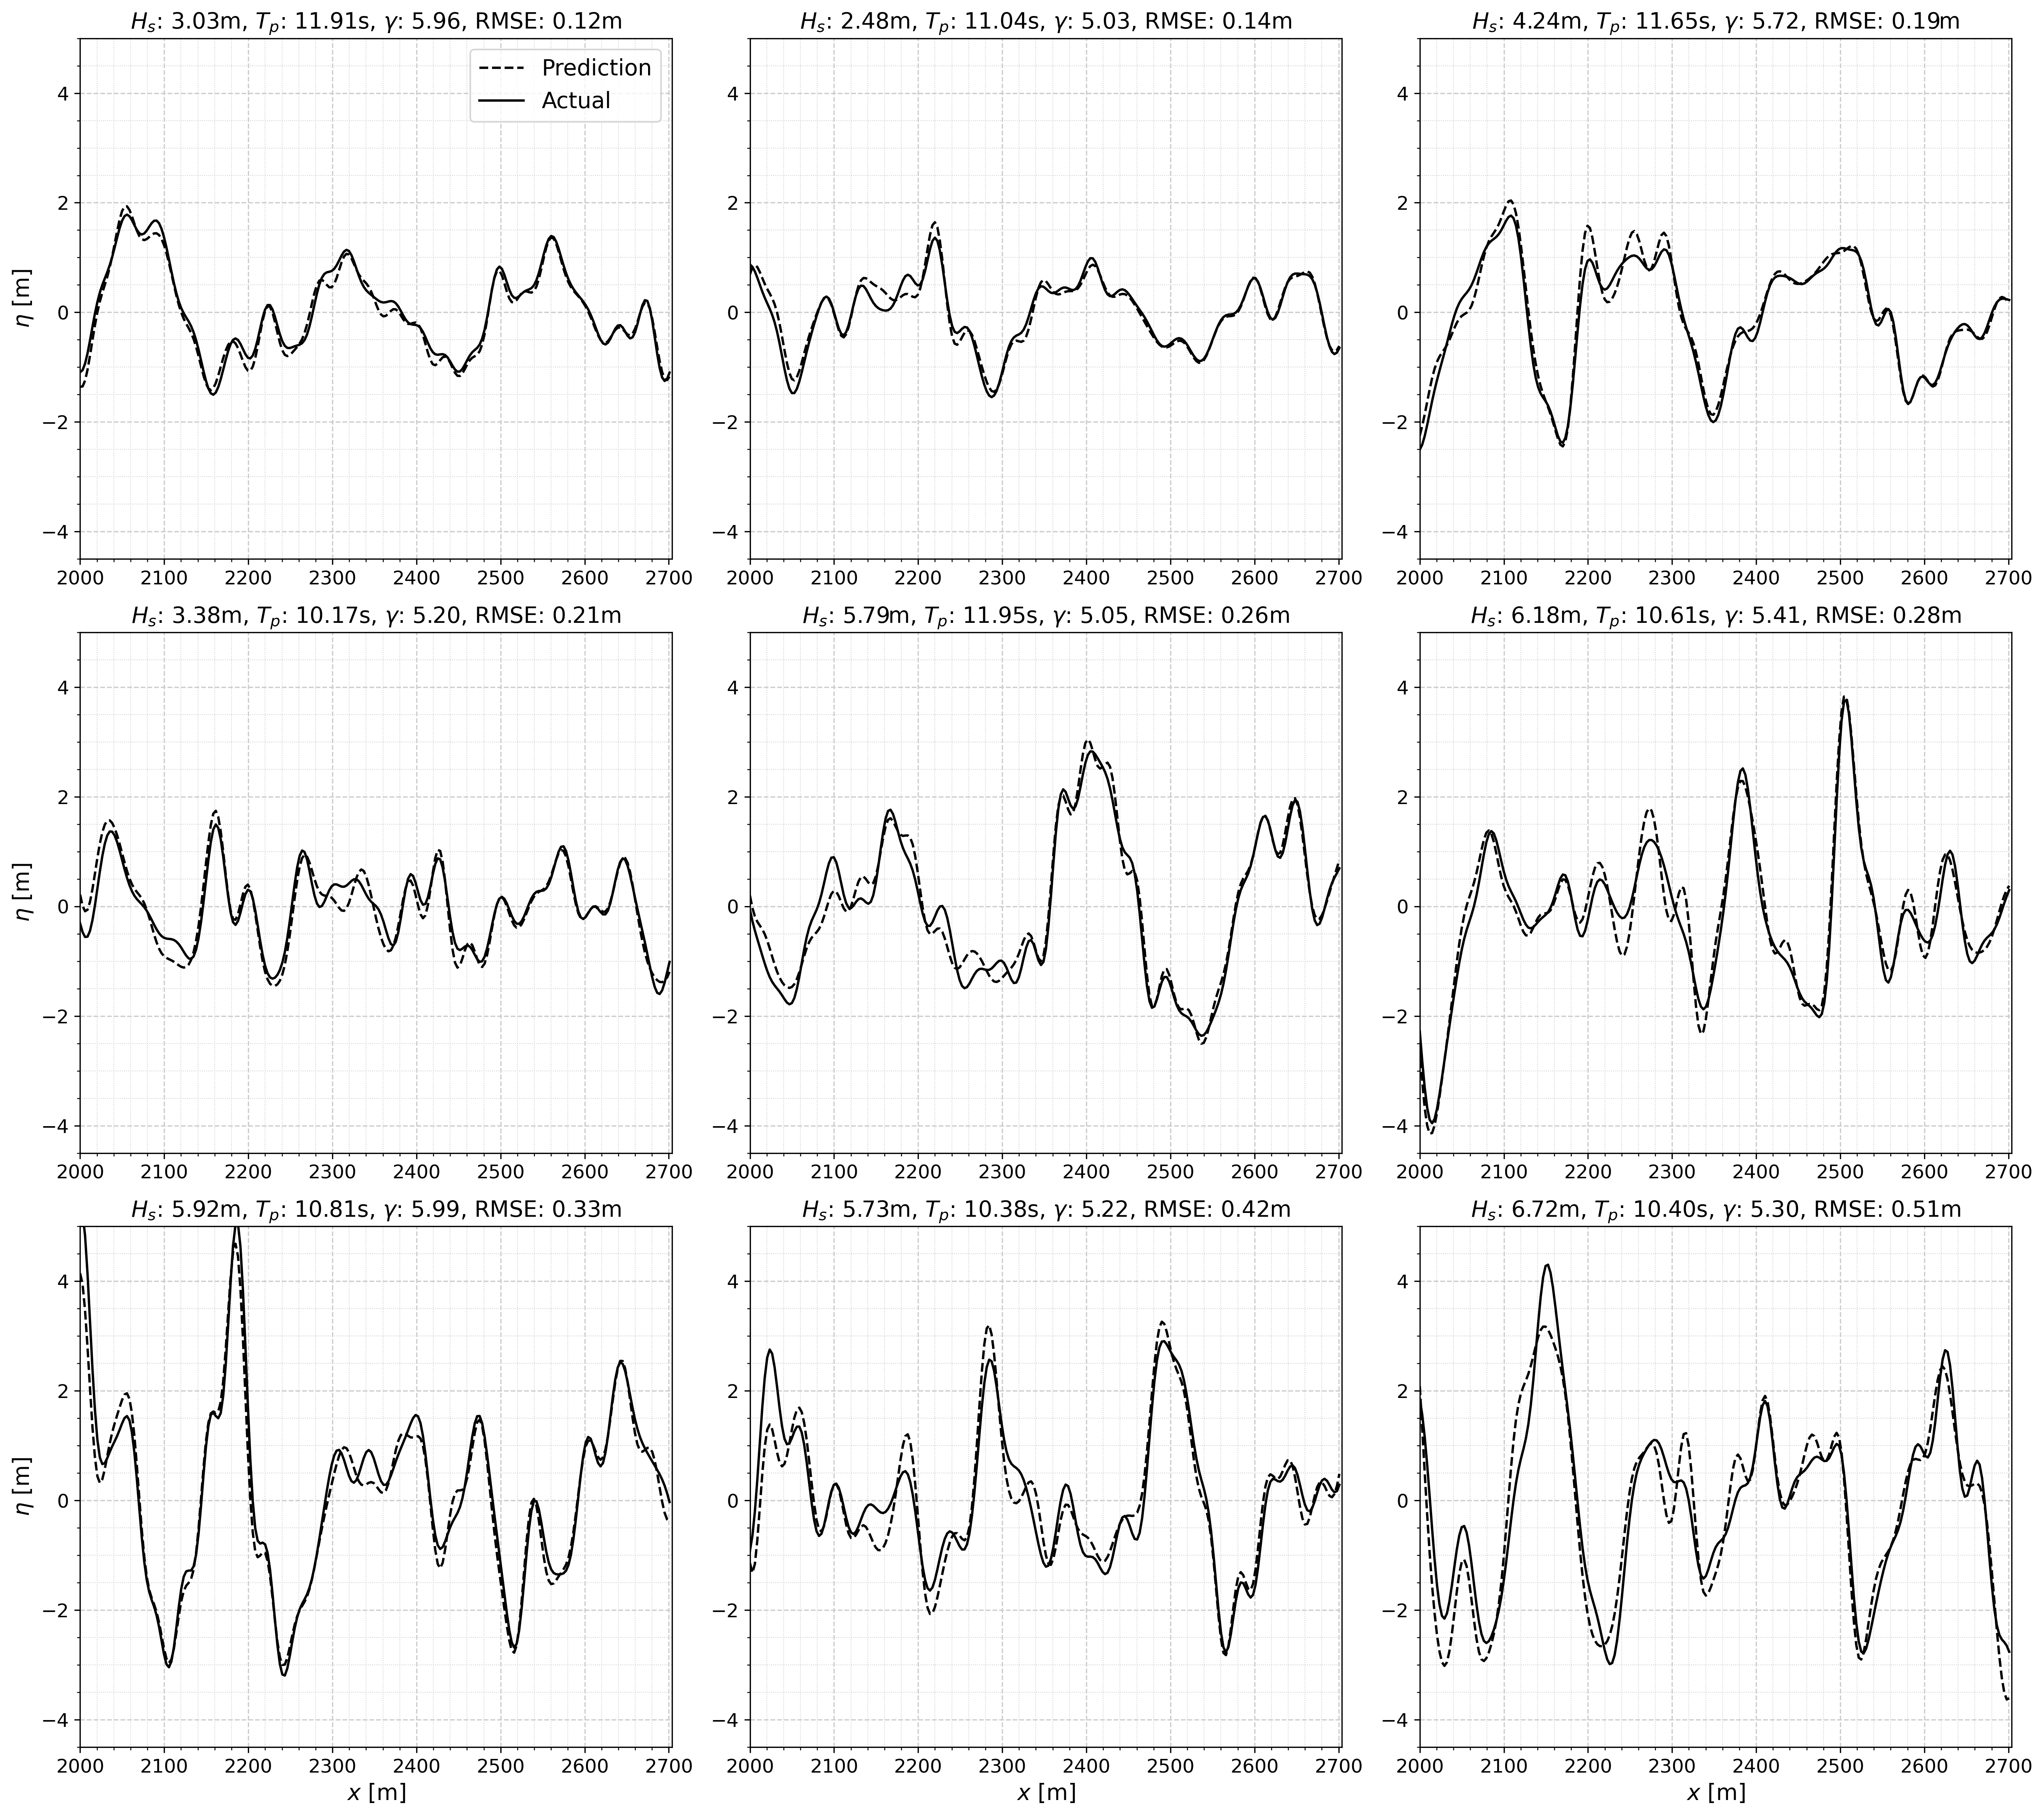

In [65]:

fig, axs = plt.subplots(3, 3, figsize=(18, 16))
for i, row in enumerate([[11, 21, 30], [31, 36, 60], [49, 59, 26]]):
    for j, col in enumerate(row):

        data = np.load(f"save/1d_physical_{col}.npz")
        y_hat = data["y"]
        y_train = data["y_test"]
        y = irfft(y_hat)

        error = y_train[cut_index:cut_index_2] - y[-1, 0, cut_index:cut_index_2]
        RMSE = np.sqrt(np.mean(error**2))

        axs[i, j].plot(x[cut_index:cut_index_2], y[-1, 0, cut_index:cut_index_2], "--", color="k", label="Prediction")
        axs[i, j].plot(x[cut_index:cut_index_2], y_train[cut_index:cut_index_2], "-", color="k", label="Actual")
        
        axs[i, j].set_xlim(x[cut_index], x[cut_index_2])
        axs[i, j].grid(True, which='major', linewidth=0.8)
        axs[i, j].minorticks_on()
        axs[i, j].grid(True, which='minor', linestyle=':', linewidth=0.5)
        axs[i, j].tick_params(labelsize=12)
        axs[i, j].set_title(fr"$H_s$: {Hs[col]:.2f}m, $T_p$: {Tp[col]:.2f}s, $\gamma$: {gamma[col]:.2f}, RMSE: {RMSE:.2f}m", fontsize=fontsize)
        axs[i, j].set_ylim(-4.5, 5)

        if i == 0 and j == 0:
            axs[i, j].legend(fontsize=fontsize)

        if i == 2:
            axs[i, j].set_xlabel('$x$ [m]', fontsize=fontsize)

        if j == 0:
            axs[i, j].set_ylabel(fr"$\eta$ [m]", fontsize=fontsize)

plt.tight_layout()
plt.savefig("results/example_physical_1d.pdf", dpi=300, bbox_inches='tight')